In [2]:
dataset <- read.csv("../data/processed/clean_1_day_ahead.csv", stringsAsFactors = T)
dataset <- dataset[,-1]
dataset <- dataset[,-seq(19, 25)]
summary(dataset)

     ACWO_1            ADMO_1         ADRR_1          CSO_1      
 Min.   :   0.00   Min.   :   1   Min.   :145.0   Min.   :27794  
 1st Qu.:   0.00   1st Qu.:1074   1st Qu.:244.0   1st Qu.:28841  
 Median :   0.00   Median :1476   Median :328.0   Median :29923  
 Mean   :  87.32   Mean   :1552   Mean   :333.2   Mean   :29774  
 3rd Qu.:   0.00   3rd Qu.:1918   3rd Qu.:422.0   3rd Qu.:30501  
 Max.   :4864.00   Max.   :3813   Max.   :784.0   Max.   :31711  
     DPB_1            DPH_1            HTB_1           HTH_1       
 Min.   :-10.00   Min.   :-15.00   Min.   : 8.00   Min.   :  6.00  
 1st Qu.: 30.00   1st Qu.: 28.00   1st Qu.:45.00   1st Qu.: 44.00  
 Median : 44.00   Median : 43.00   Median :59.00   Median : 61.00  
 Mean   : 42.95   Mean   : 41.49   Mean   :59.22   Mean   : 60.99  
 3rd Qu.: 57.00   3rd Qu.: 57.00   3rd Qu.:74.00   3rd Qu.: 77.00  
 Max.   : 74.00   Max.   : 75.00   Max.   :97.00   Max.   :100.00  
     ITP_1          OGO_1           PPL_1            PS_1     

In [3]:
m <- glm(Abnormal ~., dataset, family=binomial)
summary(m)


Call:
glm(formula = Abnormal ~ ., family = binomial, data = dataset)

Coefficients: (6 not defined because of singularities)
              Estimate Std. Error z value Pr(>|z|)    
(Intercept)  3.360e+02  9.499e+01   3.537 0.000405 ***
ACWO_1       1.364e-01  3.821e-02   3.571 0.000356 ***
ADMO_1      -1.364e-01  3.818e-02  -3.572 0.000355 ***
ADRR_1       2.593e-04  1.733e-03   0.150 0.881049    
CSO_1       -1.366e-01  3.821e-02  -3.576 0.000348 ***
DPB_1        1.781e-02  5.125e-02   0.348 0.728194    
DPH_1       -9.148e-04  4.739e-02  -0.019 0.984597    
HTB_1       -3.812e-02  5.787e-02  -0.659 0.510102    
HTH_1       -3.975e-02  4.978e-02  -0.799 0.424560    
ITP_1       -1.363e-01  3.819e-02  -3.569 0.000359 ***
OGO_1        1.366e-01  3.818e-02   3.576 0.000348 ***
PPL_1        1.369e-01  3.822e-02   3.581 0.000343 ***
PS_1         1.363e-01  3.820e-02   3.568 0.000360 ***
RRIR_1              NA         NA      NA       NA    
RRR_1               NA         NA      NA       N

package 'pROC' was built under R version 4.3.2


Type 'citation("pROC")' for a citation.

Attaching package: 'pROC'

The following objects are masked from 'package:stats':

    cov, smooth, var

Setting levels: control = False, case = True
Setting direction: controls < cases


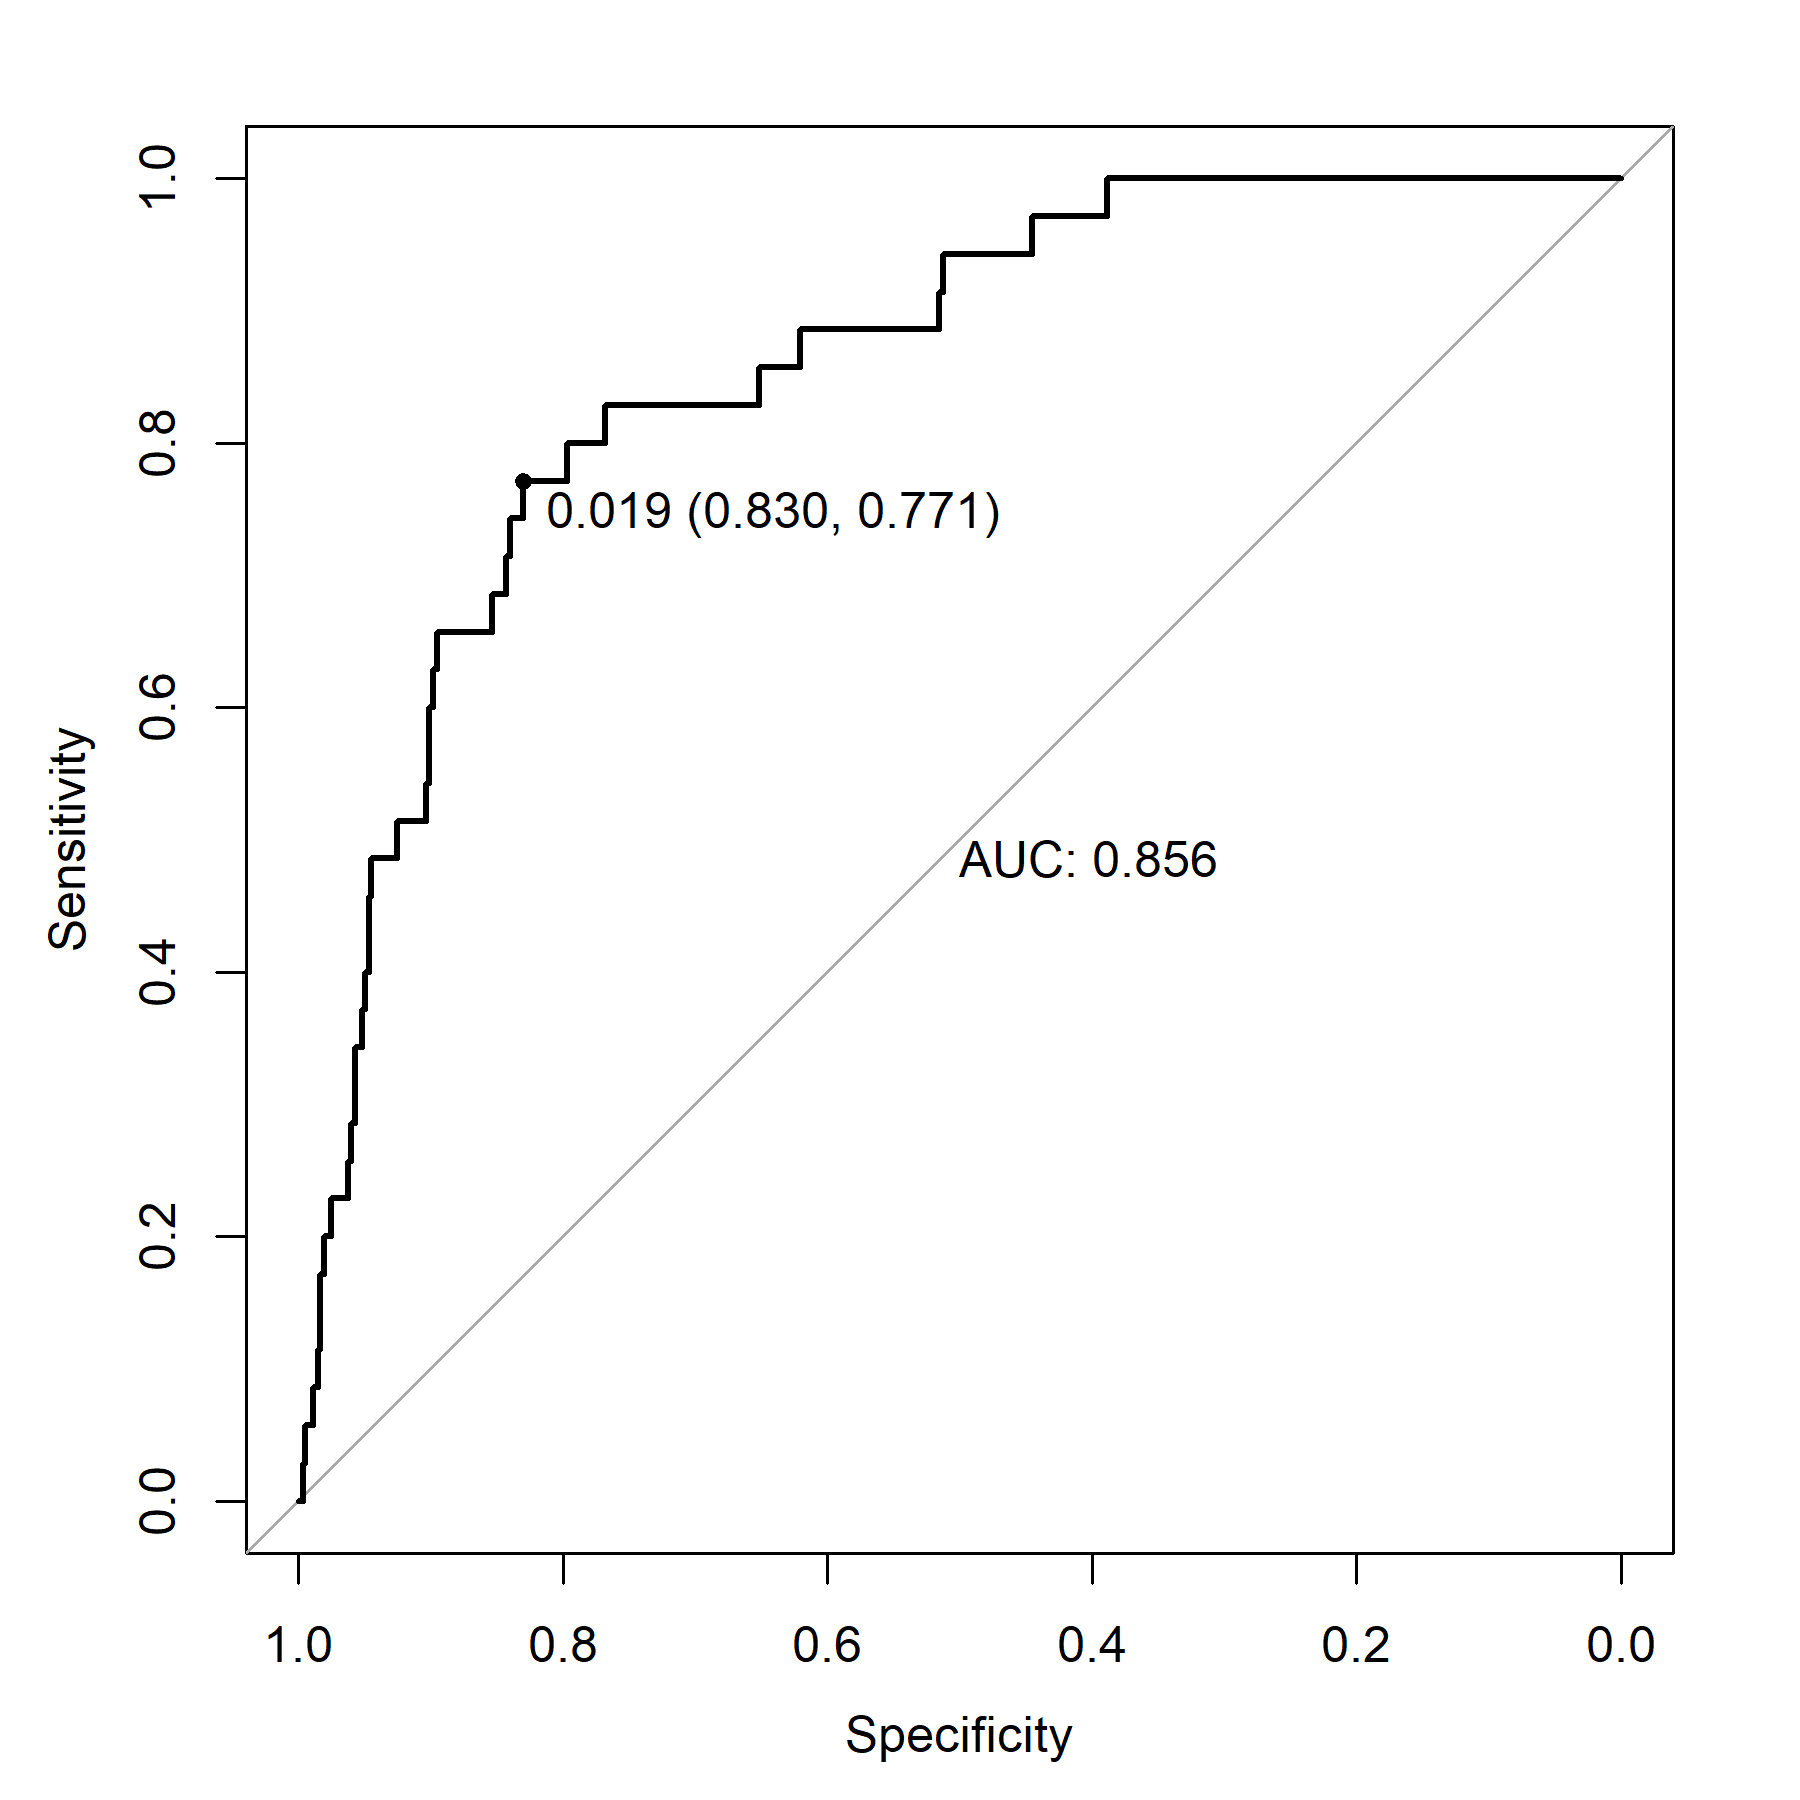

In [4]:
pred <- predict(m, dataset, type="response")

library(pROC)

# Compute roc
res.roc <- roc(dataset$Abnormal, pred)
plot.roc(res.roc, print.auc = TRUE, print.thres = "best")

In [5]:
pred1 <- as.factor(ifelse(pred >= 0.019, "True", "False"))
mean(pred1 == dataset$Abnormal)
summary(pred1)

[1] 0.8262231

False  True 
 2092   463 

In [6]:
library(caret)
confusionMatrix(as.factor(pred1), 
                as.factor(dataset$Abnormal), 
                positive="True")

Loading required package: ggplot2


package 'ggplot2' was built under R version 4.3.1


Loading required package: lattice


Confusion Matrix and Statistics

          Reference
Prediction False True
     False  2084    8
     True    436   27
                                         
               Accuracy : 0.8262         
                 95% CI : (0.811, 0.8407)
    No Information Rate : 0.9863         
    P-Value [Acc > NIR] : 1              
                                         
                  Kappa : 0.0851         
                                         
 Mcnemar's Test P-Value : <2e-16         
                                         
            Sensitivity : 0.77143        
            Specificity : 0.82698        
         Pos Pred Value : 0.05832        
         Neg Pred Value : 0.99618        
             Prevalence : 0.01370        
         Detection Rate : 0.01057        
   Detection Prevalence : 0.18121        
      Balanced Accuracy : 0.79921        
                                         
       'Positive' Class : True           
                                         